In [31]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.2/148.2 KB 2.4 MB/s eta 0:00:00 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 KB 2.7 MB/s eta 0:00:003.1 MB/s eta 0:00:01


In [40]:
# first function
def function_1(input_1):
    return input_1 + " Hi "


def function_2(input_2):
    return input_2 + "there "

In [4]:
from langgraph.graph import Graph

# define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge("node_1", "node_2")

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [42]:
app.invoke("Hello")

'Hello Hi there '

In [43]:
input = "Hello"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}': ")
        print("---")
        print(value)
        
    print("\n---\n")

Output from node 'node_1': 
---
Hello Hi 

---

Output from node 'node_2': 
---
Hello Hi there 

---



In [46]:
# adding LLM

!pip install langchain langchain_openai
!pip install python-dotenv

In [1]:
from dotenv import load_dotenv
import os

# load environment variables from .env file
load_dotenv()

# Now you can access your environment variables using os.environ
os.environ['OPENAI_API_KEY'] = os.environ.get("OPENAI_API_KEY")

In [2]:
from langchain_openai import ChatOpenAI

# set the model as ChatOpenAI
model = ChatOpenAI(temperature=0)

# call the model with a user message
model.invoke("Hey there")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 9, 'total_tokens': 19, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BRtbFkrBmNrO5ppA5OQEGeGNs0frY', 'finish_reason': 'stop', 'logprobs': None}, id='run-1640fcba-a47a-45ef-b6ce-c63df080f1bd-0', usage_metadata={'input_tokens': 9, 'output_tokens': 10, 'total_tokens': 19, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [49]:
model.invoke("Hey there").content

'Hello! How can I assist you today?'

In [52]:
def function_1(input_1):
    response = model.invoke(input_1)
    return response.content

def function_2(input_2):
    return "Agent says: "+input_2

In [53]:
# define a langchain graph
workflow = Graph()

workflow.add_node("Agent", function_1)
workflow.add_node("Node_2", function_2)

workflow.add_edge('Agent', 'Node_2')

workflow.set_entry_point("Agent")
workflow.set_finish_point("Node_2")

app = workflow.compile()

In [54]:
app.invoke("Hey there")

'Agent says: Hello! How can I assist you today?'

In [55]:
input = "Hello"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}': ")
        print("---")
        print(value)
        
    print("\n---\n")

Output from node 'Agent': 
---
Hello! How can I assist you today?

---

Output from node 'Node_2': 
---
Agent says: Hello! How can I assist you today?

---



In [15]:
def function_1(input_1):
    query = "Your task is to extract question from the text and try answering it.\n Text: " + input_1
    response = model.invoke(query)
    return response.content

def function_2(input_2):
    return "Answer by bot : " + input_2

def function_3(input_3):
    prompt ="""Based on the answer provided who do you think have been suffered more during and after independence of India.
    Hindu, Muslims?. Who would have required more financial support by Indian government?
    \n Answer: """ + input_3
    response = model.invoke(prompt)
    return response


# define a Langchain graph
workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)
workflow.add_node("node_3", function_3)


workflow.add_edge("agent", "node_2")
workflow.add_edge("node_2", "node_3")

workflow.set_entry_point("agent")
workflow.set_finish_point("node_3")

app = workflow.compile()

In [16]:
app.invoke("So Rohit!, Where did hindus from Pakistan move after India got Independence?")

AIMessage(content='Based on the answer provided, it can be inferred that Hindus from Pakistan may have suffered more during and after independence of India. They would likely have required more financial support from the Indian government due to the displacement and challenges they faced in moving to India.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 81, 'total_tokens': 132, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BRu2mTRuHyx7mhFM7RoIWbOAhOyZj', 'finish_reason': 'stop', 'logprobs': None}, id='run-5435ff6d-e9e6-4050-8414-b00eeba0fef5-0', usage_metadata={'input_tokens': 81, 'output_tokens': 51, 'total_tokens': 132, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output

ERROR: Could not find a version that satisfies the requirement pyown (from versions: none)
ERROR: No matching distribution found for pyown


In [17]:
from dotenv import load_dotenv

load_dotenv()

True

In [22]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def add_one(input: list[HumanMessage]):
    input[0].content = input[0].content + "a"
    return input

graph = MessageGraph()

graph.add_node("branch_a", add_one)
graph.add_node("branch_b", add_one)
graph.add_node("branch_c", add_one)
graph.add_node("final_node", add_one)

graph.add_edge("branch_a", "branch_b")
graph.add_edge("branch_a", "branch_c")
graph.add_edge("branch_b", "final_node")
graph.add_edge("branch_c", "final_node")
graph.add_edge("final_node", END)

graph.set_entry_point("branch_a")

runnable = graph.compile() 

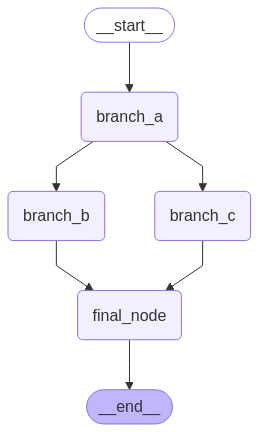

In [23]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [24]:
runnable.invoke("a")

[HumanMessage(content='aaaaa', additional_kwargs={}, response_metadata={}, id='e2c90d1a-3a66-4964-8c05-7bb2932ed9d8')]

In [29]:
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph

def entry(input: list[HumanMessage]):
    return input

def work_with_b(input: list[HumanMessage]):
    print("Using branch B")
    return input

def work_with_c(input: list[HumanMessage]):
    print("Using branch C")
    return input

def router(input: list[HumanMessage]):
    if "use_b" in input[0].content:
        return "branch_b_"
    else:
        return "branch_c_"
    

graph = MessageGraph()

graph.add_node("branch_a", entry)
graph.add_node("branch_b", work_with_b)
graph.add_node("branch_c", work_with_c)


graph.add_conditional_edges(
    "branch_a",
    router,
    {"branch_b_": "branch_b", "branch_c_": "branch_c"}
)

graph.add_edge("branch_b", END)
graph.add_edge("branch_c", END)

graph.set_entry_point("branch_a")

runnable = graph.compile()


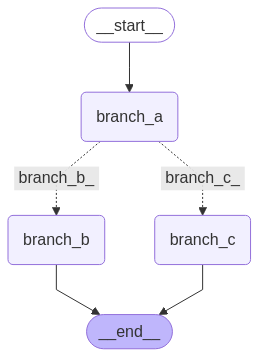

In [30]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [31]:
runnable.invoke("hello")

Using branch C


[HumanMessage(content='hello', additional_kwargs={}, response_metadata={}, id='b4502c99-636f-4f23-a5dd-a540e2e32540')]

In [32]:
runnable.invoke("Hey, Can we use_b for the solution")

Using branch B


[HumanMessage(content='Hey, Can we use_b for the solution', additional_kwargs={}, response_metadata={}, id='b56e7350-9428-410e-b3ab-552ab09c5b4e')]

In [33]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from langgraph.graph import END, MessageGraph


model = ChatOpenAI(temperature=0)

def entry(input:list[HumanMessage]):
    return input

def action(input: list[HumanMessage]):
    print("Action taken: ", [msg.content for msg in input])
    if len(input) > 5:
        input.append(HumanMessage(content='end'))
    else:
        input.append(HumanMessage(content="continue"))
        
def should_continue(input: list):
    last_message = input[-1]
    if "end" in last_message.content:
        return "__end__"
    return "action"


graph = MessageGraph()

graph.add_node("agent", entry)
graph.add_node("action", action)

graph.add_conditional_edges(
    "agent",
    should_continue,
    {"action": "action", "__end__": END}
    )

graph.add_edge("action", "agent")

graph.set_entry_point("agent")

runnable = graph.compile()

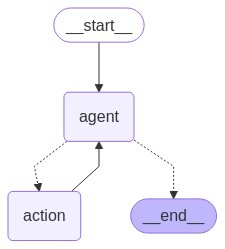

In [34]:
from IPython.display import Image, display

display(Image(runnable.get_graph().draw_mermaid_png()))

In [35]:
runnable.invoke("Hello")

Action taken:  ['Hello']
Action taken:  ['Hello', 'continue']
Action taken:  ['Hello', 'continue', 'continue']
Action taken:  ['Hello', 'continue', 'continue', 'continue']
Action taken:  ['Hello', 'continue', 'continue', 'continue', 'continue']
Action taken:  ['Hello', 'continue', 'continue', 'continue', 'continue', 'continue']


[HumanMessage(content='Hello', additional_kwargs={}, response_metadata={}, id='1431968e-fce8-4170-a623-2497df9bbb3e'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='19872286-40a5-417e-92b2-14dde2bc87b4'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='082f0e35-ca96-47bc-b98a-5d47c019ddc5'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='d303b0ad-eedf-4191-b2f1-c53ae1dde987'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='d79acabe-5be8-477f-b563-b93d19380aa0'),
 HumanMessage(content='continue', additional_kwargs={}, response_metadata={}, id='9aa52028-edfb-4756-bd69-b3c0e6a26db6'),
 HumanMessage(content='end', additional_kwargs={}, response_metadata={}, id='9b9af33d-8b5f-462e-bc60-a2b44ffed266')]

In [ ]:
from langchain_openai import ChatOpenAI

model = ChatOpenAI(temperature=0)

In [3]:

from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]
    api_call_count: int = 0

In [4]:
from langchain_core.tools import tool
import random

@tool
def fake_weather_api(city: str) -> str:
    """
    Check the weather in a specified city. The API is available randomly, approximately every third call
    """
    
    if random.randint(1, 3) == 1:
        return "Sunny, 22 degree Celcius"
    else:
        return "Service temporarily unavailable"
    


In [6]:
print(fake_weather_api("New York"))
print(fake_weather_api("New Delhi"))
print(fake_weather_api("Texus"))

Service temporarily unavailable
Service temporarily unavailable
Sunny, 22 degree Celcius


In [7]:
llm_with_tools = model.bind_tools([fake_weather_api])

In [48]:
from langchain_core.messages import HumanMessage, ToolMessage

tool_mapping = {"fake_weather_api": fake_weather_api}

messages = [HumanMessage("How will the weather be in munich today? I would like to eat outside if possible")]
llm_output = llm_with_tools.invoke(messages)
messages.append(llm_output)
print(messages)

print("llm_output", llm_output)

[HumanMessage(content='How will the weather be in munich today? I would like to eat outside if possible', additional_kwargs={}, response_metadata={}), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_1NezEPTT0oxMDhPjNF8rs7nS', 'function': {'arguments': '{"city":"Munich"}', 'name': 'fake_weather_api'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 76, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BSRgCfYrpWF5vV0lAs7obp33buNXC', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-482dc416-7a6d-419b-970d-cb327cf6e218-0', tool_calls=[{'name': 'fake_weather_api', 'args': {'city': 'Munich'}, 'id': 'call_1NezEPTT0oxMDhPjNF8rs7nS', 'type': 'to

In [49]:
for tool_call in llm_output.tool_calls:
    tool = tool_mapping[tool_call["name"].lower()]
    tool_output = tool.invoke(tool_call['args'])
    messages.append(ToolMessage(content=tool_output, tool_call_id=tool_call['id']))
    
llm_with_tools.invoke(messages)

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_TvJoVdvN0qRrKASFa9lXV5l4', 'function': {'arguments': '{"city":"Munich"}', 'name': 'fake_weather_api'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 105, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BSRgDPNigU13IVCCI8FGXovhqLV0G', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-05e22d8e-e6f0-4bc7-840d-aac54900c5df-0', tool_calls=[{'name': 'fake_weather_api', 'args': {'city': 'Munich'}, 'id': 'call_TvJoVdvN0qRrKASFa9lXV5l4', 'type': 'tool_call'}], usage_metadata={'input_tokens': 105, 'output_tokens': 18, 'total_tokens': 123, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'out

In [ ]:
def should_continue(state: AgentState):
    print("STATE: ", state)
    messages = state['messages']
    last_messages = messages[-1]
    if not last_messages.tool_calls:
        return "end"
    else:
        return "continue"
    

def call_model(state: AgentState):
    messages = state['messages']
    response = llm_with_tools.invoke(messages)
    